In [1]:
import pickle
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.signal import savgol_filter
import imageio
import pickle
from moviepy.editor import *

my_dpi = 96

In [2]:
class Prep_Data():
    def __init__(self, path=None, filter_size=401):
        with open(path, "rb") as p:
            data = pickle.load(p, encoding='latin1')
        
        self.vels = data["vels"]
        self.kds = data["kds"]
        self.dvs = data["dvs"]        
        self.states = data["states"]
        self.vels_smooth = savgol_filter(self.vels, filter_size, 3)
        self.label = path.split("data/")[-1].split("_/")[0]
        self.advs = np.zeros((5000,2))
        self.advs[0:4000] += data["adversaries"][1000:]

In [3]:
# push forward
adv_mode = "forward"
hzd_base_path = "log/2000/adv/"+"hzd"+"_"+adv_mode+"/fix_1.0_/"
hzdrl_base_path = "log/2000/adv/"+"hzdrl"+"_"+adv_mode+"/fix_1.0_/"
hzd_data = Prep_Data(path=glob.glob(hzd_base_path+"*.pkl")[0])
hzdrl_data = Prep_Data(path=glob.glob(hzdrl_base_path+"*.pkl")[0])

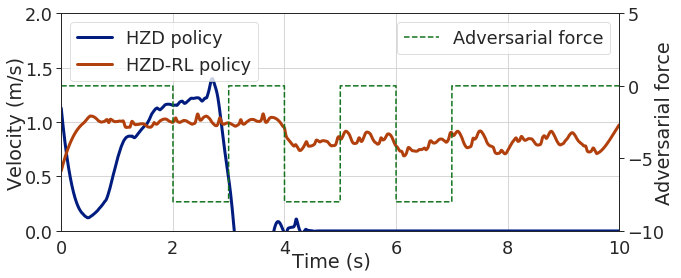

In [67]:
sns.set_style("white")
sns.set_context("paper", font_scale=2)

colors = sns.color_palette("dark", 9)
times = np.arange(5000)*0.002

f, ax1 = plt.subplots(1, figsize=(10,4))

adv_mode = "backward_hard"
hzd_base_path = "log/2000/adv/"+"hzd"+"_"+adv_mode+"/fix_1.0_/"
hzdrl_base_path = "log/2000/adv/"+"hzdrl"+"_"+adv_mode+"/fix_1.0_/"
hzd_data = Prep_Data(path=glob.glob(hzd_base_path+"*.pkl")[0])
hzdrl_data = Prep_Data(path=glob.glob(hzdrl_base_path+"*.pkl")[0])
ax1.plot(times, hzd_data.vels_smooth, "-", color=colors[0], linewidth=3, label="HZD policy")
ax1.plot(times, hzdrl_data.vels_smooth, "-", color=colors[1], linewidth=3, label="HZD-RL policy")
ax1.set_ylim(0., 2.0)
ax1.set_xlim(0., 10)
ax1.legend(loc=2)
ax1.grid(True)
ax11 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax11.plot(times, hzdrl_data.advs.T[0], "--", color=colors[2], linewidth=1.5, label="Adversarial force")
ax11.set_ylim(-10., 5.0)
ax11.legend(loc=0)
ax11.grid(False)
ax11.set(yticks=[-10, -5, 0, 5])


f.text(0.5, 0.0, 'Time (s)', ha='center')
f.text(0.05, 0.5, 'Velocity (m/s)', va='center', rotation='vertical')
f.text(0.95, 0.5, 'Adversarial force', va='center', rotation='vertical')

figure = ax1.get_figure()
figure.savefig('adv_backward_hard.pdf', format='pdf', dpi=1000)

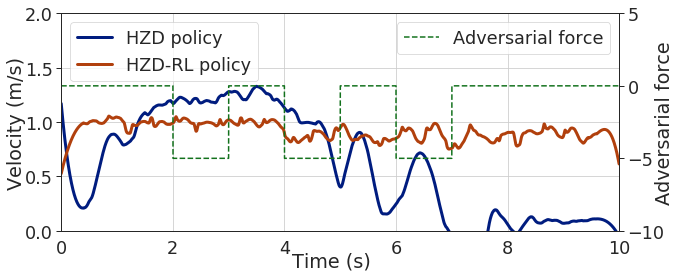

In [64]:
sns.set_style("white")
sns.set_context("paper", font_scale=2)

colors = sns.color_palette("dark", 9)
times = np.arange(5000)*0.002

f, ax1 = plt.subplots(1, figsize=(10,3))

adv_mode = "backward"
hzd_base_path = "log/2000/adv/"+"hzd"+"_"+adv_mode+"/fix_1.0_/"
hzdrl_base_path = "log/2000/adv/"+"hzdrl"+"_"+adv_mode+"/fix_1.0_/"
hzd_data = Prep_Data(path=glob.glob(hzd_base_path+"*.pkl")[0])
hzdrl_data = Prep_Data(path=glob.glob(hzdrl_base_path+"*.pkl")[0])
ax1.plot(times, hzd_data.vels_smooth, "-", color=colors[0], linewidth=3, label="HZD policy")
ax1.plot(times, hzdrl_data.vels_smooth, "-", color=colors[1], linewidth=3, label="HZD-RL policy")
ax1.set_ylim(0., 2.0)
ax1.set_xlim(0., 10)
ax1.legend(loc=2)
ax1.grid(True)
ax11 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax11.plot(times, hzdrl_data.advs.T[0], "--", color=colors[2], linewidth=1.5, label="Adversarial force")
ax11.set_ylim(-10., 5.0)
ax11.legend(loc=0)
ax11.grid(False)
ax11.set(yticks=[-10, -5, 0, 5])


f.text(0.5, 0.0, 'Time (s)', ha='center')
f.text(0.05, 0.5, 'Velocity (m/s)', va='center', rotation='vertical')
f.text(0.95, 0.5, 'Adversarial force', va='center', rotation='vertical')

figure = ax1.get_figure()
figure.savefig('adv_backward.pdf', format='pdf', dpi=1000)



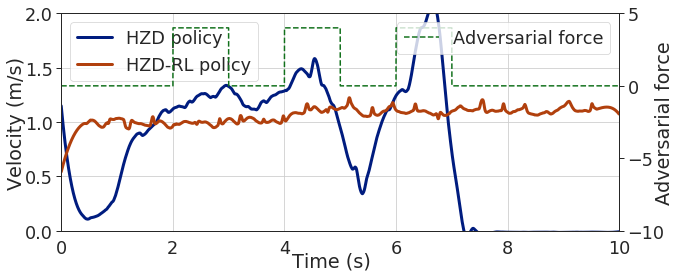

In [65]:
sns.set_style("white")
sns.set_context("paper", font_scale=2)

colors = sns.color_palette("dark", 9)
times = np.arange(5000)*0.002

f, ax1 = plt.subplots(1, figsize=(10,3))

adv_mode = "forward"
hzd_base_path = "log/2000/adv/"+"hzd"+"_"+adv_mode+"/fix_1.0_/"
hzdrl_base_path = "log/2000/adv/"+"hzdrl"+"_"+adv_mode+"/fix_1.0_/"
hzd_data = Prep_Data(path=glob.glob(hzd_base_path+"*.pkl")[0])
hzdrl_data = Prep_Data(path=glob.glob(hzdrl_base_path+"*.pkl")[0])
ax1.plot(times, hzd_data.vels_smooth, "-", color=colors[0], linewidth=3, label="HZD policy")
ax1.plot(times, hzdrl_data.vels_smooth, "-", color=colors[1], linewidth=3, label="HZD-RL policy")
ax1.set_ylim(0., 2.0)
ax1.set_xlim(0., 10)
ax1.legend(loc=2)
ax1.grid(True)
ax11 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax11.plot(times, hzdrl_data.advs.T[0], "--", color=colors[2], linewidth=1.5, label="Adversarial force")
ax11.set_ylim(-10., 5.0)
ax11.legend(loc=1)
ax11.grid(False)
ax11.set(yticks=[-10, -5, 0, 5])


f.text(0.5, 0.0, 'Time (s)', ha='center')
f.text(0.05, 0.5, 'Velocity (m/s)', va='center', rotation='vertical')
f.text(0.95, 0.5, 'Adversarial force', va='center', rotation='vertical')

figure = ax1.get_figure()
figure.savefig('adv_forward.pdf', format='pdf', dpi=1000)

In [58]:
policy_mode = "hzdrl"
adv_mode = "forward"
base_path = "log/2000/adv/"+policy_mode+"_"+adv_mode+"/fix_1.0_/"
motion_frames = []
for i in range(5000):
    if i % 25 == 0 and i>2250 and i<2450:
        frame_path = base_path+"frames/"+str("%05d" % i)+".jpg"
        img = imageio.imread(frame_path)
        img = img[150:310, 150:300, :]
        motion_frames += [img]
motion_img = np.concatenate(motion_frames, axis=1)
imageio.imwrite(base_path+policy_mode+"_"+adv_mode+"_motion.jpg", motion_img)

In [12]:
policy_mode = "hzd"
adv_mode = "forward"
base_path = "log/2000/adv/"+policy_mode+"_"+adv_mode+"/fix_1.0_/"
motion_frames = []
for i in range(5000):
    if i % 25 == 0 and i>3150 and i<3350:
        frame_path = base_path+"frames/"+str("%05d" % i)+".jpg"
        img = imageio.imread(frame_path)
        img = img[150:310, 150:300, :]
        motion_frames += [img]
motion_img = np.concatenate(motion_frames, axis=1)
imageio.imwrite(base_path+policy_mode+"_"+adv_mode+"_motion.jpg", motion_img)

In [13]:
policy_mode = "hzdrl"
adv_mode = "backward"
base_path = "log/2000/adv/"+policy_mode+"_"+adv_mode+"/fix_1.0_/"
motion_frames = []
for i in range(5000):
    if i % 75 == 0 and i>3200 and i<3850:
        frame_path = base_path+"frames/"+str("%05d" % i)+".jpg"
        img = imageio.imread(frame_path)
        img = img[150:310, 200:350, :]
        motion_frames += [img]
motion_img = np.concatenate(motion_frames, axis=1)
imageio.imwrite(base_path+policy_mode+"_"+adv_mode+"_motion.jpg", motion_img)

In [14]:
policy_mode = "hzd"
adv_mode = "backward"
base_path = "log/2000/adv/"+policy_mode+"_"+adv_mode+"/fix_1.0_/"
motion_frames = []
for i in range(5000):
    if i % 75 == 0 and i>3200 and i<3850:
        frame_path = base_path+"frames/"+str("%05d" % i)+".jpg"
        img = imageio.imread(frame_path)
        img = img[150:310, 200:350, :]
        motion_frames += [img]
motion_img = np.concatenate(motion_frames, axis=1)
imageio.imwrite(base_path+policy_mode+"_"+adv_mode+"_motion.jpg", motion_img)

In [15]:
policy_mode = "hzdrl"
adv_mode = "backward_hard"
base_path = "log/2000/adv/"+policy_mode+"_"+adv_mode+"/fix_1.0_/"
motion_frames = []
for i in range(5000):
    if i % 100 == 0 and i>1000 and i<2000:
        frame_path = base_path+"frames/"+str("%05d" % i)+".jpg"
        img = imageio.imread(frame_path)
        img = img[150:310, 200:350, :]
        motion_frames += [img]
motion_img = np.concatenate(motion_frames, axis=1)
imageio.imwrite(base_path+policy_mode+"_"+adv_mode+"_motion.jpg", motion_img)

In [16]:
policy_mode = "hzd"
adv_mode = "backward_hard"
base_path = "log/2000/adv/"+policy_mode+"_"+adv_mode+"/fix_1.0_/"
motion_frames = []
for i in range(5000):
    if i % 100 == 0 and i>1000 and i<2000:
        frame_path = base_path+"frames/"+str("%05d" % i)+".jpg"
        img = imageio.imread(frame_path)
        img = img[150:310, 200:350, :]
        motion_frames += [img]
motion_img = np.concatenate(motion_frames, axis=1)
imageio.imwrite(base_path+policy_mode+"_"+adv_mode+"_motion.jpg", motion_img)